# Wrangle and Analyze Data

## Table of Contents
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Storing, Analyzing, and Visualizing Data](#store)

## Gathering Data
<a id='gather'></a>

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import requests as rq
import json as js
import tweepy
from tweepy import OAuthHandler
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

### Twitter Archive

In [2]:
 #reading the twitter archive from CSV file
arch= pd.read_csv('twitter-archive-enhanced.csv')
arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tweet Image Prediction

In [3]:
#Downloading the image prediction files from udacity server using the Request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = rq.get(url)

#Creating a file
with open (url.split('/')[7], mode='wb') as file:
    file.write(response.content)
    
#Reading Image Predictions
prd = pd.read_csv('image-predictions.tsv', sep='\t' )
prd.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API data

In [4]:
#Defining API keys
consumer_key = 'CK'
consumer_secret = 'CS'
access_token = 'AT'
access_secret = 'AS'

#Tweepy query twitter API for each tweet in the twitter archive
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
twjsn = pd.read_json('tweet-json.txt', lines =True) #reading the json file and store info in variable twjsn
twjsn.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
<a id='assess'></a>

### 1.Visual Assessment
Assessing each type of gathered data by previewing a smaple of five rows from each.

#### Twitter Archive

In [6]:
arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,11,10,Reggie,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Tweet Image Prediction

In [7]:
prd.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1629,805207613751304193,https://pbs.twimg.com/media/CyysDQlVIAAYgrl.jpg,1,Pembroke,0.244705,True,Rhodesian_ridgeback,0.180461,True,Cardigan,0.094664,True
1661,811744202451197953,https://pbs.twimg.com/media/C0PlCQjXAAA9TIh.jpg,1,Pekinese,0.386082,True,Labrador_retriever,0.202862,True,golden_retriever,0.170487,True
756,688519176466644993,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
1003,708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True


#### Twitter API Data

In [8]:
twjsn.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
613,NaN,NaN,2016-11-10 17:02:03,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 796759815062253568, 'id_str'...",13256,False,Say hello to Romeo. He was just told that it's...,NaN,...,0.0,NaN,NaN,NaN,3562,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2329,NaN,NaN,2015-11-16 20:32:58,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666353280906170368, 'id_str'...",229,False,Here we have a mixed Asiago from the Galápagos...,NaN,...,0.0,NaN,NaN,NaN,77,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2049,NaN,NaN,2015-12-01 00:38:31,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671488510226997248, 'id_str'...",1073,False,This is Julius. He's a cool dog. Carries seash...,NaN,...,0.0,NaN,NaN,NaN,516,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
923,NaN,NaN,2016-07-18 18:43:07,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 755110610942169088, 'id_str'...",23446,False,This is Watson. He trust falls on command. 13/...,NaN,...,0.0,NaN,NaN,NaN,12621,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1279,NaN,NaN,2016-03-13 00:24:26,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708810903379005440, 'id_str'...",18036,False,This is Mister. He's a wonderful father to his...,NaN,...,0.0,NaN,NaN,NaN,7848,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### 2.Programmatic Assessment
Assessing each type of gathered data by using predefined functions to explore the data.

#### Twitter Archive

In [9]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
arch.isnull().sum() #Checking for null values

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
(arch['tweet_id'].duplicated()).sum() #Checking for duplicate tweets by ID

0

In [13]:
arch.name.value_counts() #Counting Dog's name appearance in the dataset

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Bailey       7
an           7
Daisy        7
Toby         7
Buddy        7
Leo          6
Rusty        6
Dave         6
Jax          6
Koda         6
Milo         6
Bella        6
Scout        6
Stanley      6
Oscar        6
Jack         6
Sammy        5
          ... 
Acro         1
Randall      1
Furzey       1
Richie       1
Barclay      1
Jay          1
Orion        1
life         1
Julio        1
Noah         1
Simba        1
Marty        1
Lorelei      1
Ambrose      1
Tycho        1
Mac          1
Dudley       1
Iggy         1
Emma         1
Hamrick      1
Chloe        1
Cora         1
Brooks       1
Crimson      1
Rilo         1
Chuq         1
Willem       1
Jed          1
Devón        1
Eazy         1
Name: name, Length: 957, dtype: int64

In [14]:
(arch.loc[:,'doggo':'puppo'] != 'None').sum() #Counting the not "None" of each stage

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [15]:
(arch.loc[:,'doggo':'puppo'] == 'None').sum() #Counting the None Values of each stage

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

In [16]:
arch.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [17]:
arch.retweeted_status_id.notnull().sum() #Checking for retweets

181

#### Tweet Image Prediction

In [18]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
prd.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
prd.isnull().sum() #Checking for null values

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
(prd['jpg_url'].duplicated()).sum() #Checking for duplicates by image url

66

In [22]:
prd.jpg_url.value_counts() #Counting the quantity for ech url

https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                       

In [23]:
prd.img_num.value_counts() #Counting the quantity of each image number

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Twitter API Data

In [24]:
twjsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [25]:
twjsn.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [26]:
twjsn.isnull().sum() #Checking for null values

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [27]:
twjsn.retweeted_status.notnull().sum() #Checking for retweets

179

### Quality Issues

#### Twitter Archive:

#### Tweet Image Prediction:

#### Twitter API Data:

### Tidiness Issues

## Cleaning Data
<a id='clean'></a>

In [28]:
#Creating a copy of each dataset
arch_clean = arch.copy()
prd_clean = prd.copy()
twjsn_clean = twjsn.copy()

#### Twitter Archive:


##### Issue#1

##### Code

In [29]:
arch_clean = arch_clean[pd.isnull(arch_clean['retweeted_status_user_id'])]

##### Test

In [30]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Issue#2

##### Code

In [31]:
names = arch_clean['name'].unique() #Creating a list to store all names

#looping throgh the list to identify names that start with small letter and replace them by null
for name in names:
    if name[0].islower():
        print(name)
        arch_clean.replace(name , np.nan, inplace=True)

such
a
quite
not
one
incredibly
very
my
his
an
actually
just
getting
mad
this
unacceptable
all
old
infuriating
the
by
officially
life
light
space


##### Test

In [32]:
arch_clean['name'].value_counts()

None         680
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Oscar          6
Jax            6
Bo             6
Bailey         6
Stanley        6
Koda           6
Bella          6
Rusty          5
Louis          5
Milo           5
Buddy          5
Dave           5
Leo            5
Bentley        5
Chester        5
Scout          5
Archie         4
Scooter        4
            ... 
Cal            1
Huxley         1
Petrick        1
Flurpson       1
Andru          1
Brooks         1
Cora           1
Chloe          1
Kobe           1
Bubba          1
Genevieve      1
Gustaf         1
Snickers       1
Chaz           1
Remy           1
Ike            1
Meyer          1
Ole            1
Noah           1
Emma           1
Simba          1
Marty          1
Lorelei        1
Ambrose        1
Tycho          1
Mac            1
Dudley         1
Iggy          

##### Issue#3

##### Code

In [33]:
#REF: https://github.com/taglitis/weratedogs/blob/master/wrangle_act.ipynb

#Creating a list of the currently existing vlaues
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

#Creating a list of the new vlaues
newList = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']


[arch_clean.source.replace(source_list,newList, inplace=True) for current_source, new_source in zip(source_list, newList)];

##### Test

In [34]:
arch_clean['source'].value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

##### Issue#4

##### Code

In [35]:
#Replacing the None values by Nan (Null)
arch_clean.replace('None', np.nan, inplace=True)

##### Test

In [36]:
(arch_clean.loc[:,'name':'puppo'] == 'None').sum() #Counting the None Values for each attribute

name       0
doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

##### Issue#5

##### Code

In [37]:
#Removing unused columns
arch_clean = arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], 1)

##### Test

In [38]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Tweet Image Prediction:


##### Issue#6

##### Code

In [39]:
prd_clean = prd_clean.drop_duplicates(subset=['jpg_url'], keep='last') #Removing duplicates

##### Test

In [40]:
(prd_clean['jpg_url'].duplicated()).sum() #Checking for duplicate tweets by ID

0

##### Issue#7

##### Code

In [41]:
#Removing unused columns
prd_clean = prd_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], 1)

##### Test

In [42]:
prd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
dtypes: int64(1), object(1)
memory usage: 47.1+ KB


#### Twitter API Data:


##### Issue#8

##### Code

In [43]:
twjsn_clean = twjsn_clean[pd.isnull(twjsn_clean['retweeted_status'])] #Removing retweets
twjsn_clean = twjsn_clean[pd.isnull(twjsn_clean['quoted_status'])] #Removing quote retweets

##### Test

In [44]:
twjsn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2147 non-null datetime64[ns]
display_text_range               2147 non-null object
entities                         2147 non-null object
extended_entities                1994 non-null object
favorite_count                   2147 non-null int64
favorited                        2147 non-null bool
full_text                        2147 non-null object
geo                              0 non-null float64
id                               2147 non-null int64
id_str                           2147 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

##### Issue#9

##### Code

In [45]:
#Removing unused columns
twjsn_clean = twjsn_clean.drop(['contributors','coordinates', 'geo', 'place', 'entities', 'id_str','in_reply_to_screen_name', 'in_reply_to_status_id', 'extended_entities',
                                'in_reply_to_status_id_str','in_reply_to_user_id', 'display_text_range','in_reply_to_user_id_str', 'truncated', 'user', 'source','created_at',
                                'possibly_sensitive', 'possibly_sensitive_appealable','quoted_status', 'quoted_status_id', 'quoted_status_id_str','retweeted', 'retweeted_status'], 1)

##### Test

In [46]:
twjsn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2353
Data columns (total 7 columns):
favorite_count     2147 non-null int64
favorited          2147 non-null bool
full_text          2147 non-null object
id                 2147 non-null int64
is_quote_status    2147 non-null bool
lang               2147 non-null object
retweet_count      2147 non-null int64
dtypes: bool(2), int64(3), object(2)
memory usage: 104.8+ KB


### Tidiness Issues

##### Issue#1

##### Code

In [47]:
#Creating a new column calles 'stage' to combine the four columns in
arch_clean['stage'] = arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)

#Dropping the previous four columns
arch_clean = arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

##### Test

In [48]:
arch_clean.stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

##### Issue#2

##### Code

In [49]:
#REF: https://rachelchen0104.medium.com/weratedogs-project-part-ii-data-cleaning-and-data-analysis-b1ea2811d98b

#Renaming the 'id' column in the json datafram to 'tweet_id' so we can do a join based on it
twjsn_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#use the outer join based on the tweet_id columns that exists in all of three datasets
mg = pd.merge(arch_clean, prd_clean, on = 'tweet_id', how = 'outer')
mg = pd.merge(mg, twjsn_clean, on = 'tweet_id', how = 'outer')

##### Test

In [50]:
mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 16 columns):
tweet_id              2256 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1391 non-null object
stage                 2175 non-null object
jpg_url               2009 non-null object
favorite_count        2147 non-null float64
favorited             2147 non-null object
full_text             2147 non-null object
is_quote_status       2147 non-null object
lang                  2147 non-null object
retweet_count         2147 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 299.6+ KB


## Storing, Analyzing, and Visualizing Data
<a id='store'></a>

#### Storing the new master dataset:

In [51]:
mg.to_csv('twitter_master_ds.csv', encoding = 'utf-8', index=False)

### The most popular dogs names

Text(0,0.5,'Frequency')

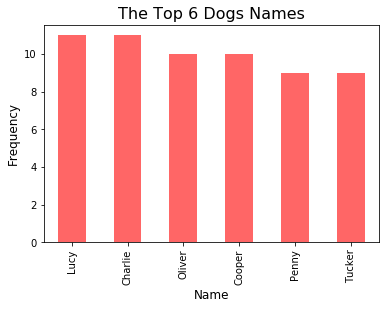

In [52]:
pop_names = mg['name'].value_counts().nlargest(6) #Storing the top six names in the dataset in term of frequency
pop_names = pop_names.sort_values(ascending=False) #sorting values in a descending order
pop_names.plot.bar(color='r', alpha=0.6) #Plotting the results
plt.title('The Top 6 Dogs Names', size=16)
plt.xlabel('Name', size=12)
plt.ylabel('Frequency', size=12)

### The distribution of dogs stage in the dataset

Text(0,0.5,'Stage')

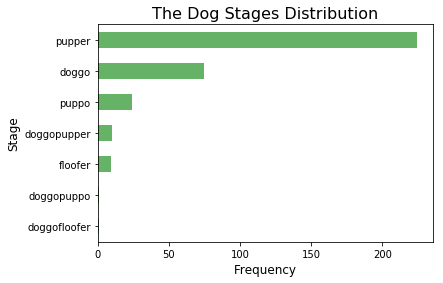

In [53]:
dog_stg = mg[mg['stage'] !=""] # we only need the rows with stages

dog_stg = dog_stg.stage.value_counts() #Storing Satges Count
dog_stg = dog_stg.sort_values() #sorting values in a descending order
dog_stg.plot(kind='barh',color='g', alpha=0.6) #plotting the stages
plt.title('The Dog Stages Distribution', size=16)
plt.xlabel('Frequency', size=12)
plt.ylabel('Stage', size=12)

### The distribution of Tweets Source

Text(0,0.5,'Frequency')

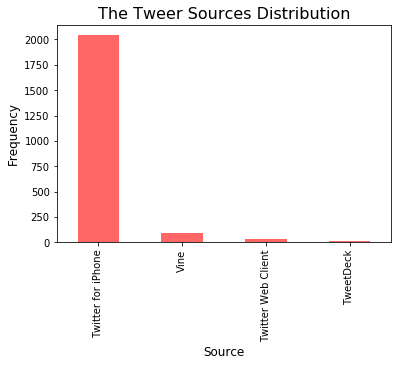

In [54]:
src = mg['source'].value_counts() #Storing the sources in the dataset in term of frequency
src.plot.bar(color='r', alpha=0.6) #Plotting the results
plt.title('The Tweer Sources Distribution', size=16)
plt.xlabel('Source', size=12)
plt.ylabel('Frequency', size=12)




### The Relation between Retweet and Favorite counts

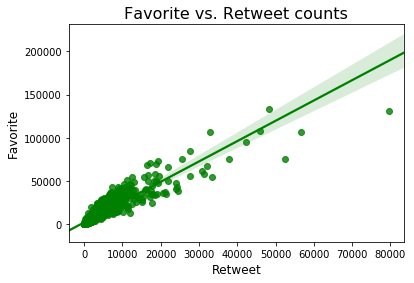

In [55]:
#Storing RTW and FAV counts in variables
rt=mg['retweet_count']
fv=mg['favorite_count']

g = sb.regplot(x=rt, y=fv, color='g') #plotting the two variables
plt.title("Favorite vs. Retweet counts", size=16)
plt.xlabel('Retweet', size=12)
plt.ylabel('Favorite', size=12)
plt.show()